# Blending and Pasting Images with OpenCv

In [1]:
import cv2

In [27]:
img1 = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

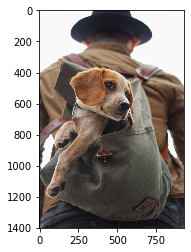

In [6]:
plt.imshow(img1)

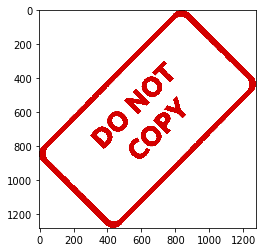

In [7]:
plt.imshow(img2)

In [8]:
img1.shape

(1401, 934, 3)

In [9]:
img2.shape

(1280, 1277, 3)

In [10]:
# Blending images of the same size

img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

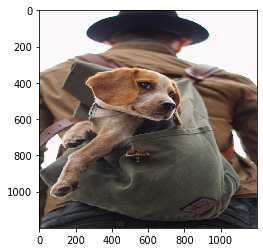

In [11]:
plt.imshow(img1)

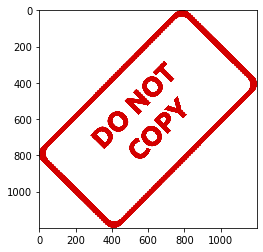

In [12]:
plt.imshow(img2)

In [13]:
blending = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

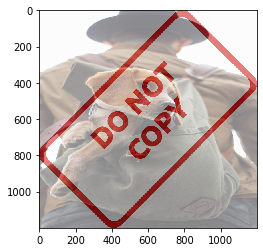

In [14]:
plt.imshow(blending)

In [15]:
blending = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=0)

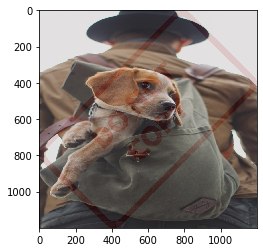

In [16]:
plt.imshow(blending)

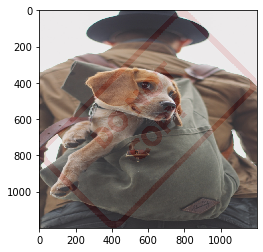

In [17]:
blending = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=10)
plt.imshow(blending)

**Overlay small image on top of a large image (no blending)**
**Numpy reassingment**

In [18]:
img1 = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [19]:
img2 = cv2.resize(img2, (600, 600))

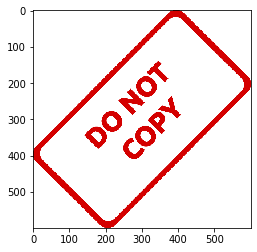

In [20]:
plt.imshow(img2)

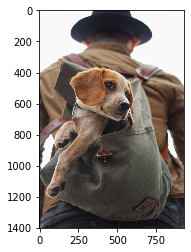

In [21]:
plt.imshow(img1)

In [22]:
large_img = img1
small_img = img2

In [23]:
x_offset = 0
y_offset = 0

In [24]:
x_end = x_offset + small_img.shape[1] 
y_end = y_offset + small_img.shape[0]

In [25]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

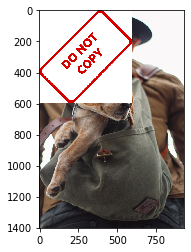

In [26]:
plt.imshow(large_img)

**Blend Togheter images of different sizes**


In [28]:
# reload img
img1 = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [29]:
img2 = cv2.resize(img2, (600, 600))

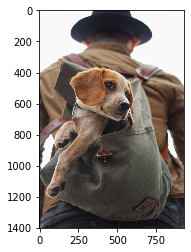

In [30]:
plt.imshow(img1)

In [31]:
img1.shape

(1401, 934, 3)

In [32]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [33]:
img2.shape

(600, 600, 3)

In [34]:
rows, cols, channels = img2.shape

In [35]:
print(rows, cols, channels)

600 600 3


In [36]:
roi = img1[y_offset:1401, x_offset:943]

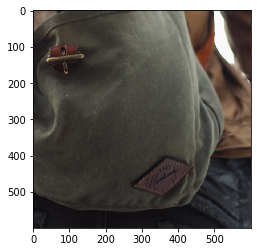

In [37]:
plt.imshow(roi)

In [38]:
# geting the gray scale (maked)

img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

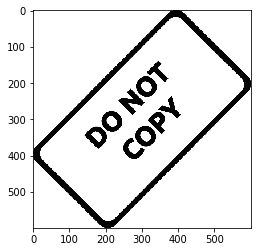

In [39]:
plt.imshow(img2gray, cmap='gray')

In [40]:
mask_inv = cv2.bitwise_not(img2gray)

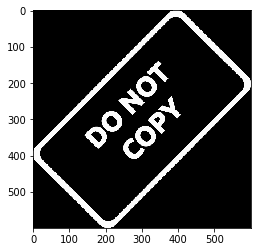

In [41]:
plt.imshow(mask_inv, cmap='gray')

In [42]:
mask_inv.shape

(600, 600)

In [43]:
import numpy as np

In [44]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [45]:
white_background.shape

(600, 600, 3)

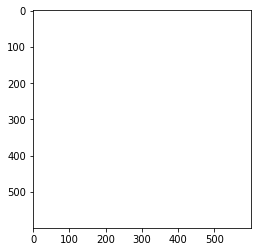

In [46]:
plt.imshow(white_background)

In [47]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [48]:
bk.shape

(600, 600, 3)

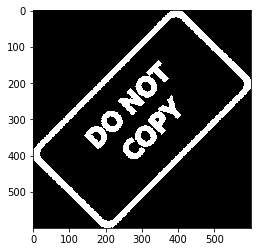

In [49]:
plt.imshow(bk)

In [50]:
# merge the original image
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

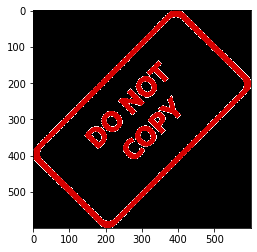

In [51]:
plt.imshow(fg)

In [52]:
final_roi = cv2.bitwise_or(roi, fg)

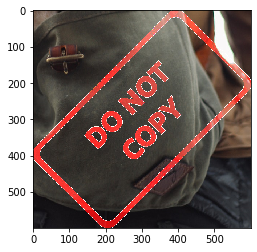

In [53]:
plt.imshow(final_roi)

In [54]:
large_img = img1
small_img = final_roi

In [55]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

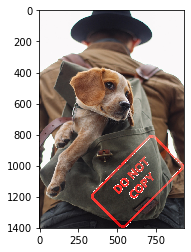

In [56]:
plt.imshow(large_img)